# 3.4 Decision Tree (wine)

Input variables (based on physicochemical tests):

   1 - fixed acidity
   
   2 - volatile acidity
   
   3 - citric acid
   
   4 - residual sugar
   
   5 - chlorides
   
   6 - free sulfur dioxide
   
   7 - total sulfur dioxide
   
   8 - density
   
   9 - pH
   
   10 - sulphates
   
   11 - alcohol
   
Output variable (based on sensory data):

   12 - quality (score between 0 and 10)

## Importing the libraries

In [1]:
!pip -q install pandas-profiling
!pip -q install ipywidgets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 356.3/356.3 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 10.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 17.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.4/455.4 kB 19.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 16.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 12.6 MB/s eta 0:00:00


In [2]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns; sns.set()

## Part 1: Load  data

In [3]:
# wine_data = pd.read_csv('./data/wine.csv')
wine_data = pd.read_csv('https://docs.google.com/spreadsheets/d/1_VLG-QVuEQFaABcsXxWmG1ASV-SVcEoEvoFDH8pUN4A/gviz/tq?tqx=out:csv&sheet=wine')

In [4]:
wine_data.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,good
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad


In [5]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   object 
dtypes: float64(11), object(1)
memory usage: 150.0+ KB


In [6]:
from ydata_profiling import ProfileReport
ProfileReport(wine_data)

Output hidden; open in https://colab.research.google.com to view.

### Handling Categorical Data With Dummy Variables

In [7]:
wine_data['quality'] = [1 if element == 'good' else 0 for element in wine_data['quality']]

## TODO: Part 2: Train/Test separation

X/y separation

In [8]:
y_data = wine_data['quality']

x_data = wine_data.drop('quality', axis = 1)

Perform hold-out method
- 80% training set
- 20% testing set

In [9]:
from sklearn.model_selection import train_test_split
x_training_data, x_test_data, y_training_data, y_test_data = train_test_split(x_data, y_data, test_size = 0.2,random_state=0)

## Part 3: Train a decision tree model
## TODO: DecisionTreeClassifier

In [10]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=0, criterion='entropy')
model

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [11]:
model.fit(x_training_data, y_training_data)

DecisionTreeClassifier(criterion='entropy', random_state=0)

Making Predictions With Our Model

In [12]:
predictions = model.predict(x_test_data)

In [13]:
predictions[0:5]

array([1, 0, 1, 0, 0])

## Part 4: Model Evaluation
### TODO

Evaluation metrics
- confusion metrix
- accuracy
- precision, recall, f1-score

Measuring the Performance

In [14]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score


print("Accuracy:\t %.3f" %accuracy_score(y_test_data, predictions))
print(classification_report(y_test_data, predictions))

Accuracy:	 0.747
              precision    recall  f1-score   support

           0       0.72      0.74      0.73       148
           1       0.77      0.76      0.76       172

    accuracy                           0.75       320
   macro avg       0.75      0.75      0.75       320
weighted avg       0.75      0.75      0.75       320



Visualizing the decision tree

In [15]:
import graphviz
from sklearn import tree

dot_data = tree.export_graphviz(model, out_file=None,
                              feature_names=x_training_data.columns,
                              class_names=['0','1'],
                              filled=True, rounded=True,
                              special_characters=True, rotate=True)
graph = graphviz.Source(dot_data)
graph.render('dtree_render')

'dtree_render.pdf'

## Part 5: Model tuning

#### Try tuning the model to see if you can make it perform better?


You can look at the parameters and functions of Decision Tree Classifier at https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

## TODO: Try tuning Hyperparameter
***Note that to do this properly, you should split data into train/validation/test set and tune them on validation set, not test set***


In [22]:
model = DecisionTreeClassifier(criterion='gini',
                               splitter='best',
                               max_depth=30,
                               min_samples_split=2,
                               min_samples_leaf=1,
                               min_weight_fraction_leaf=0.0,
                               max_features=None,
                               random_state=None,
                               max_leaf_nodes=None,
                               min_impurity_decrease=0.0,
                               class_weight=None,
                               ccp_alpha=0.0)
model.fit(x_training_data, y_training_data)
predictions = model.predict(x_test_data)
print("Accuracy:\t %.3f" %accuracy_score(y_test_data, predictions))
print(classification_report(y_test_data, predictions))

Accuracy:	 0.772
              precision    recall  f1-score   support

           0       0.74      0.78      0.76       148
           1       0.80      0.77      0.78       172

    accuracy                           0.77       320
   macro avg       0.77      0.77      0.77       320
weighted avg       0.77      0.77      0.77       320



In [23]:
import graphviz
from sklearn import tree

from sklearn import tree
dot_data = tree.export_graphviz(model, out_file=None,
                              feature_names=x_training_data.columns,
                              class_names=['0','1'],
                              filled=True, rounded=True,
                              special_characters=True, rotate=True)
graph = graphviz.Source(dot_data)
graph.render('dtree_render_maxdepth_user_specified')

'dtree_render_maxdepth_user_specified.pdf'

## TODO: Feature importance

[0.03589759 0.10611645 0.05365701 0.06239105 0.07891584 0.04461997
 0.10712804 0.04349402 0.086612   0.1227121  0.25845592]


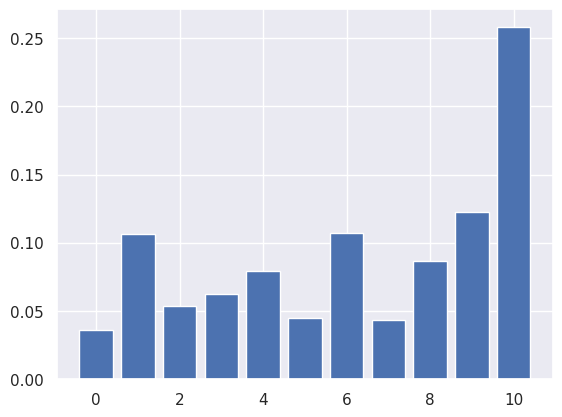

In [25]:
importances = model.feature_importances_
print(importances)

from matplotlib import pyplot
# plot
pyplot.bar(range(len(model.feature_importances_)), model.feature_importances_)
pyplot.show()

In [26]:
lr_feature_m = pd.DataFrame({'feature':x_training_data.columns,
                             'Score':model.feature_importances_})

lr_feature_m.sort_values(by = 'Score', ascending=False).head()

,feature,Score
10,alcohol,0.258456
9,sulphates,0.122712
6,total sulfur dioxide,0.107128
1,volatile acidity,0.106116
8,pH,0.086612
